In [4]:
!pip install kagglehub

  Obtaining dependency information for kagglehub from https://files.pythonhosted.org/packages/c4/d1/4ab25019a168f5c414202f124d156e11ac79f07845d67288929311f1b1b2/kagglehub-0.3.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 2.5 MB/s eta 0:00:00


In [667]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3 as sql
from sklearn.preprocessing import StandardScaler

In [668]:
!pwd

/Users/boi/Desktop/ml


In [669]:
%cd /Users/boi/Desktop/ml

/Users/boi/Desktop/ml


In [670]:
!ls

12-month moving average hourly wage growth.csv
AvgInterestRate_20010131_20240930.csv
AvgInterestRate_20191001_20240930.csv
Delinquency on credit card loans.csv
Delinquency-on-consumer-loans(2).csv
Delinquency-on-consumer-loans.csv
Househool-debt-service-payment-to-dispoable-personal-income.csv
US_macroeconomics.csv
consumer sentiment.csv
debt-stats.csv
inflation expectation.csv
lecture1-introduction.ipynb
lecture2-supervised-learning.ipynb
lecture3-linear-regression.ipynb
master_macroeconomics.csv
producer-price-index-food-alcohol.csv


In [671]:
pd.set_option('display.max_columns', 100)
data2 = pd.read_csv('master_macroeconomics.csv')

In [672]:
data2

,date,Gross Domestic Product,Gross National Product,Gross domestic product per capita,Sticky Price Consumer Price Index less Food and Energy,Producer Price Index by Commodity: All Commodities,Unemployment Rate,Labor Force Participation Rate,Personal Consumption Expenditures,Net domestic investment: Private: Domestic business,Federal Government: Current Expenditures,"Trade Balance: Goods and Services, Balance of Payments Basis",Balance on current account,U.S. Dollars to Euro Spot Exchange Rate,Japanese Yen to U.S. Dollar Spot Exchange Rate,Federal Funds Effective Rate,M1,M2,Federal Debt: Total Public Debt,Federal Surplus or Deficit [-],Advance Retail Sales: Retail Trade,Industrial Production: Total Index,New Privately-Owned Housing Units Started: Total Units,Total Construction Spending: Total Construction in the United States,Consumer Opinion Surveys: Confidence Indicators: Composite Indicators: OECD Indicator for United States,Business Tendency Surveys (Manufacturing): Confidence Indicators: Composite Indicators: OECD Indicator for United States,Leading Index for the United States,Retail Inventories: Clothing and Clothing Accessory Stores,Total Business Inventories,5-Year High Quality Market (HQM) Corporate Bond Par Yield,Corporate Profits After Tax (without IVA and CCAdj),Real Exports of Goods and Services,"Rest of the World; Foreign Direct Investment in U.S.; Asset (Current Cost), Transactions",Equity Market Volatility Tracker: Exchange Rates,Producer Price Index by Commodity: Metals and Metal Products: Gold Ores,15-Year Fixed Rate Mortgage Average in the United States,Disposable Personal Income,CBOE Volatility Index: VIX,ICE BofA US High Yield Index Effective Yield,Employment Cost Index: Total compensation: All Civilian,Federal Debt: Total Public Debt as Percent of Gross Domestic Product,Personal Saving,Gross Domestic Product (Growth),Gross National Product (Growth),Gross domestic product per capita (Growth),Sticky Price Consumer Price Index less Food and Energy (Growth),Producer Price Index by Commodity: All Commodities (Growth),Unemployment Rate (Growth),Labor Force Participation Rate (Growth),Personal Consumption Expenditures (Growth),Net domestic investment: Private: Domestic business (Growth),Federal Government: Current Expenditures (Growth),"Trade Balance: Goods and Services, Balance of Payments Basis (Growth)",Balance on current account (Growth),U.S. Dollars to Euro Spot Exchange Rate (Growth),Japanese Yen to U.S. Dollar Spot Exchange Rate (Growth),Federal Funds Effective Rate (Growth),M1 (Growth),M2 (Growth),Federal Debt: Total Public Debt (Growth),Federal Surplus or Deficit [-] (Growth),Advance Retail Sales: Retail Trade (Growth),Industrial Production: Total Index (Growth),New Privately-Owned Housing Units Started: Total Units (Growth),Total Construction Spending: Total Construction in the United States (Growth),Consumer Opinion Surveys: Confidence Indicators: Composite Indicators: OECD Indicator for United States (Growth),Business Tendency Surveys (Manufacturing): Confidence Indicators: Composite Indicators: OECD Indicator for United States (Growth),Leading Index for the United States (Growth),Retail Inventories: Clothing and Clothing Accessory Stores.1,Total Business Inventories (Growth),5-Year High Quality Market (HQM) Corporate Bond Par Yield (Growth),Corporate Profits After Tax (without IVA and CCAdj) (Growth),Real Exports of Goods and Services (Growth),"Rest of the World; Foreign Direct Investment in U.S.; Asset (Current Cost), Transactions (Growth)",Equity Market Volatility Tracker: Exchange Rates (Growth),Producer Price Index by Commodity: Metals and Metal Products: Gold Ores (Growth),15-Year Fixed Rate Mortgage Average in the United States (Growth),Disposable Personal Income (Growth),CBOE Volatility Index: VIX (Growth),ICE BofA US High Yield Index Effective Yield (Growth),Employment Cost Index: Total compensation: All Civilian (Growth),Federal Debt: Total Public Debt as Percent of Gross Domestic Product (G

In [673]:
data2_1 = data2[['date','Personal Consumption Expenditures','Producer Price Index by Commodity: All Commodities', 'Labor Force Participation Rate', 'Net domestic investment: Private: Domestic business', 'Federal Government: Current Expenditures', 'M1', 'M2','Federal Funds Effective Rate', 'Business Tendency Surveys (Manufacturing): Confidence Indicators: Composite Indicators: OECD Indicator for United States', '5-Year High Quality Market (HQM) Corporate Bond Par Yield', 'Rest of the World; Foreign Direct Investment in U.S.; Asset (Current Cost), Transactions', '15-Year Fixed Rate Mortgage Average in the United States', 'CBOE Volatility Index: VIX', 'Federal Debt: Total Public Debt as Percent of Gross Domestic Product']]

In [674]:
date = data2['date']
date

0     1/01/2001
1      4/1/2001
2      7/1/2001
3     10/1/2001
4      1/1/2002
        ...    
83    10/1/2021
84     1/1/2022
85     4/1/2022
86     7/1/2022
87    10/1/2022
Name: date, Length: 88, dtype: object

In [675]:
data2_1

,date,Personal Consumption Expenditures,Producer Price Index by Commodity: All Commodities,Labor Force Participation Rate,Net domestic investment: Private: Domestic business,Federal Government: Current Expenditures,M1,M2,Federal Funds Effective Rate,Business Tendency Surveys (Manufacturing): Confidence Indicators: Composite Indicators: OECD Indicator for United States,5-Year High Quality Market (HQM) Corporate Bond Par Yield,"Rest of the World; Foreign Direct Investment in U.S.; Asset (Current Cost), Transactions",15-Year Fixed Rate Mortgage Average in the United States,CBOE Volatility Index: VIX,Federal Debt: Total Public Debt as Percent of Gross Domestic Product
0,1/01/2001,6995.3,137.767,67.2,414.895,1982.626,1101.9,5020.8,5.60,97.477603,6.35,236820,6.59,25.73,55.14434
1,4/1/2001,7042.2,136.233,66.8,384.743,2003.581,1121.8,5146.9,4.33,97.724029,6.21,238256,6.66,23.92,54.03165
2,7/1/2001,7070.3,133.367,66.7,336.012,2037.703,1157.4,5240.9,3.50,98.315154,5.82,56512,6.51,25.38,54.79763
3,10/1/2001,7187.3,129.400,66.7,229.850,2045.404,1179.0,5384.5,2.13,98.202670,5.45,140596,6.25,27.91,55.75216
4,1/1/2002,7217.7,128.900,66.6,269.353,2091.469,1186.5,5477.2,1.73,99.728727,5.65,98976,6.46,21.36,55.69650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,10/1/2021,16518.0,241.697,61.9,725.950,6079.752,20256.4,21326.9,0.08,101.526032,1.58,499196,2.34,19.28,121.63566
84,1/1/2022,16874.8,253.042,62.3,783.017,5891.599,20614.0,21683.6,0.12,101.002261,2.40,327296,3.04,25.37,122.87943
85,4/1/2022,17261.4,272.937,62.2,669.201,5935.195,20646.1,21670.4,0.77,100.381711,3.79,360620,4.45,27.40,121.07100
86,7/1/2022,17542.7,269.906,62.2,612.164,6063.491,20392.2,21543.4,2.18,99.731402,4.21,463364,4.88,24.79,120.23396


$\large{\text{the features we decide to use to model personal consumption expenditures}}$

$\Large\text{Data Statistics}$

form standard deviation vector 

In [676]:
%cd /Users/boi/coursera
%pwd

/Users/boi/coursera


'/Users/boi/coursera'

In [677]:
conn = sqlite3.connect('database17.db')

In [683]:
data2_1.to_sql('data_table', conn)

In [679]:
standard_dev_vec = []
for i in range(2, len(data2_1.columns)):
    print(data2_1.columns[i])
    query = f"""
    SELECT SQRT(AVG(POWER("{data2_1.columns[i]}" - (SELECT AVG("{data2_1.columns[i]}") FROM data_table), 2))) AS stddev
    FROM data_table
    """
    result = conn.execute(query).fetchone()
    print(f"Standard deviation for {data2_1.columns[i]}: {result[0]}")
    standard_dev_vec.append(result[0])


Producer Price Index by Commodity: All Commodities
Standard deviation for Producer Price Index by Commodity: All Commodities: 31.010608346635333
Labor Force Participation Rate
Standard deviation for Labor Force Participation Rate: 1.7153532362771844
Net domestic investment: Private: Domestic business
Standard deviation for Net domestic investment: Private: Domestic business: 191.08985334401515
Federal Government: Current Expenditures
Standard deviation for Federal Government: Current Expenditures: 1400.3771636142233
M1
Standard deviation for M1: 5608.255925341413
M2
Standard deviation for M2: 4626.666873274867
Federal Funds Effective Rate
Standard deviation for Federal Funds Effective Rate: 1.6141800620523334
Business Tendency Surveys (Manufacturing): Confidence Indicators: Composite Indicators: OECD Indicator for United States
Standard deviation for Business Tendency Surveys (Manufacturing): Confidence Indicators: Composite Indicators: OECD Indicator for United States: 1.1485072220729

In [680]:
conn.close()

In [681]:
print(standard_dev_vec)

[31.010608346635333, 1.7153532362771844, 191.08985334401515, 1400.3771636142233, 5608.255925341413, 4626.666873274867, 1.6141800620523334, 1.1485072220729566, 1.5350618434186403, 162171.64214345286, 1.3058356780934646, 7.815479883764852, 23.14536125047079]


$\Large{\text{Data visualization}}$

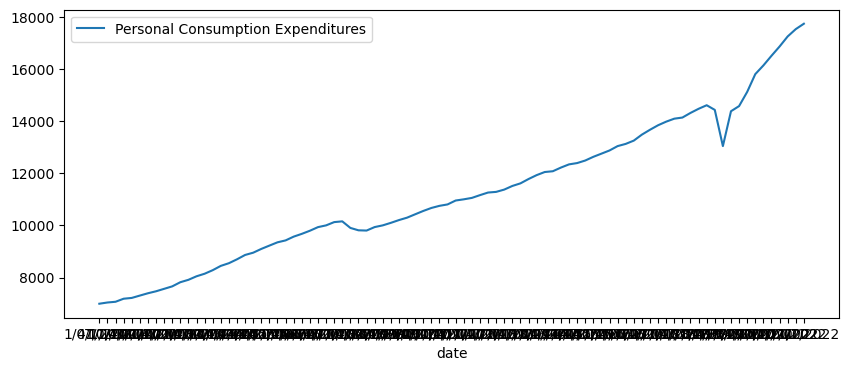

In [684]:
plt.figure(figsize = (10,4))
plt.xlabel('date')
plt.plot(date, data2_1['Personal Consumption Expenditures'], label = 'Personal Consumption Expenditures')
plt.legend()

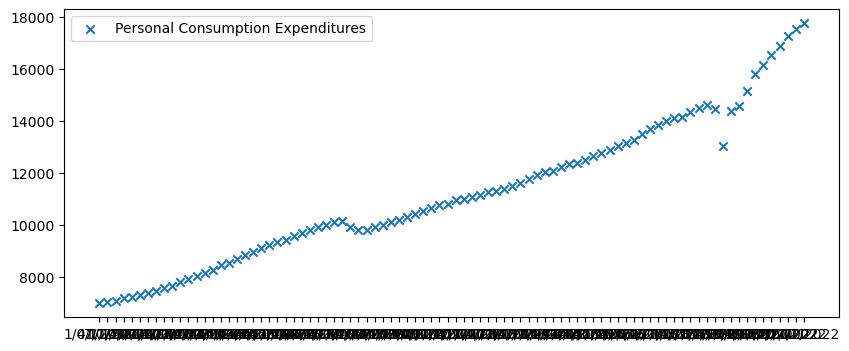

In [685]:
plt.figure(figsize = (10,4))
plt.scatter(date, data2_1['Personal Consumption Expenditures'], marker='x', label = 'Personal Consumption Expenditures')
plt.legend()

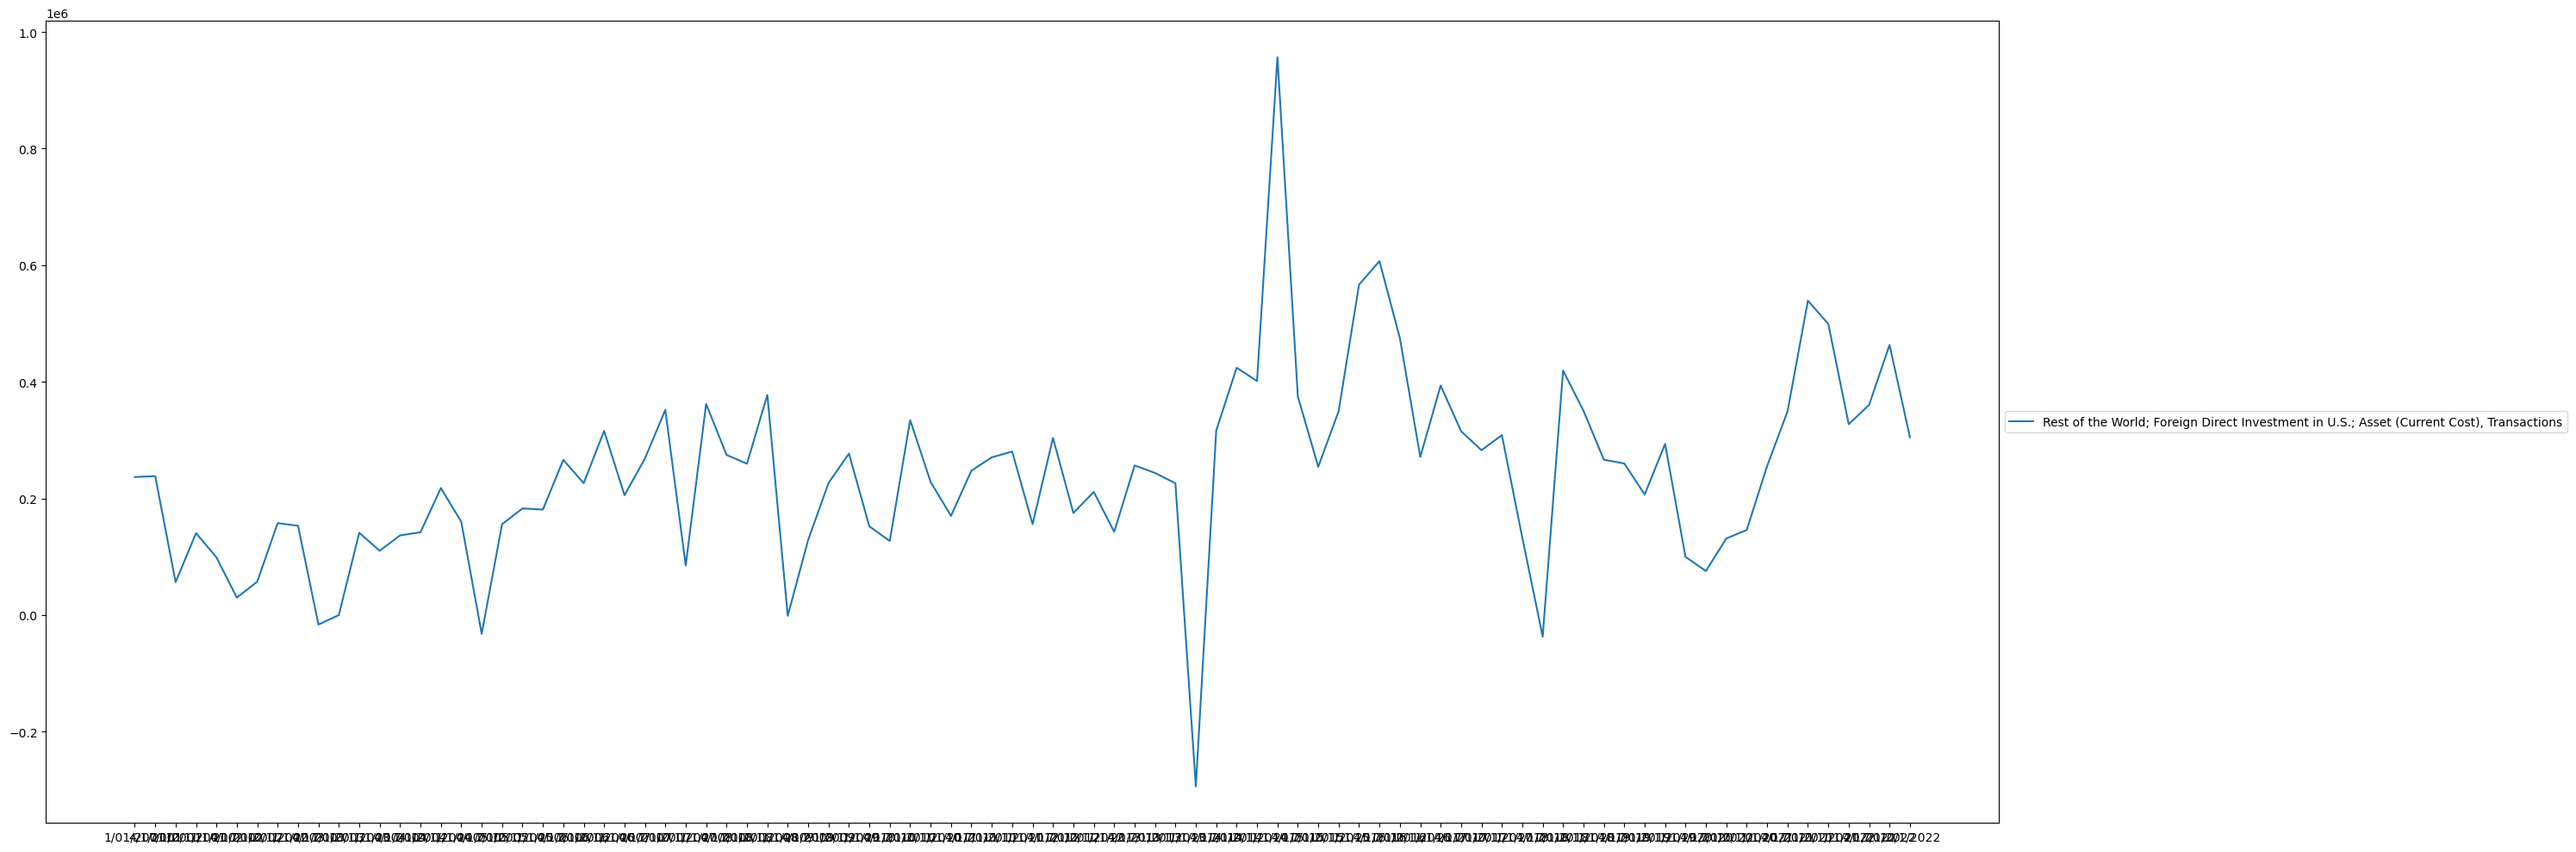

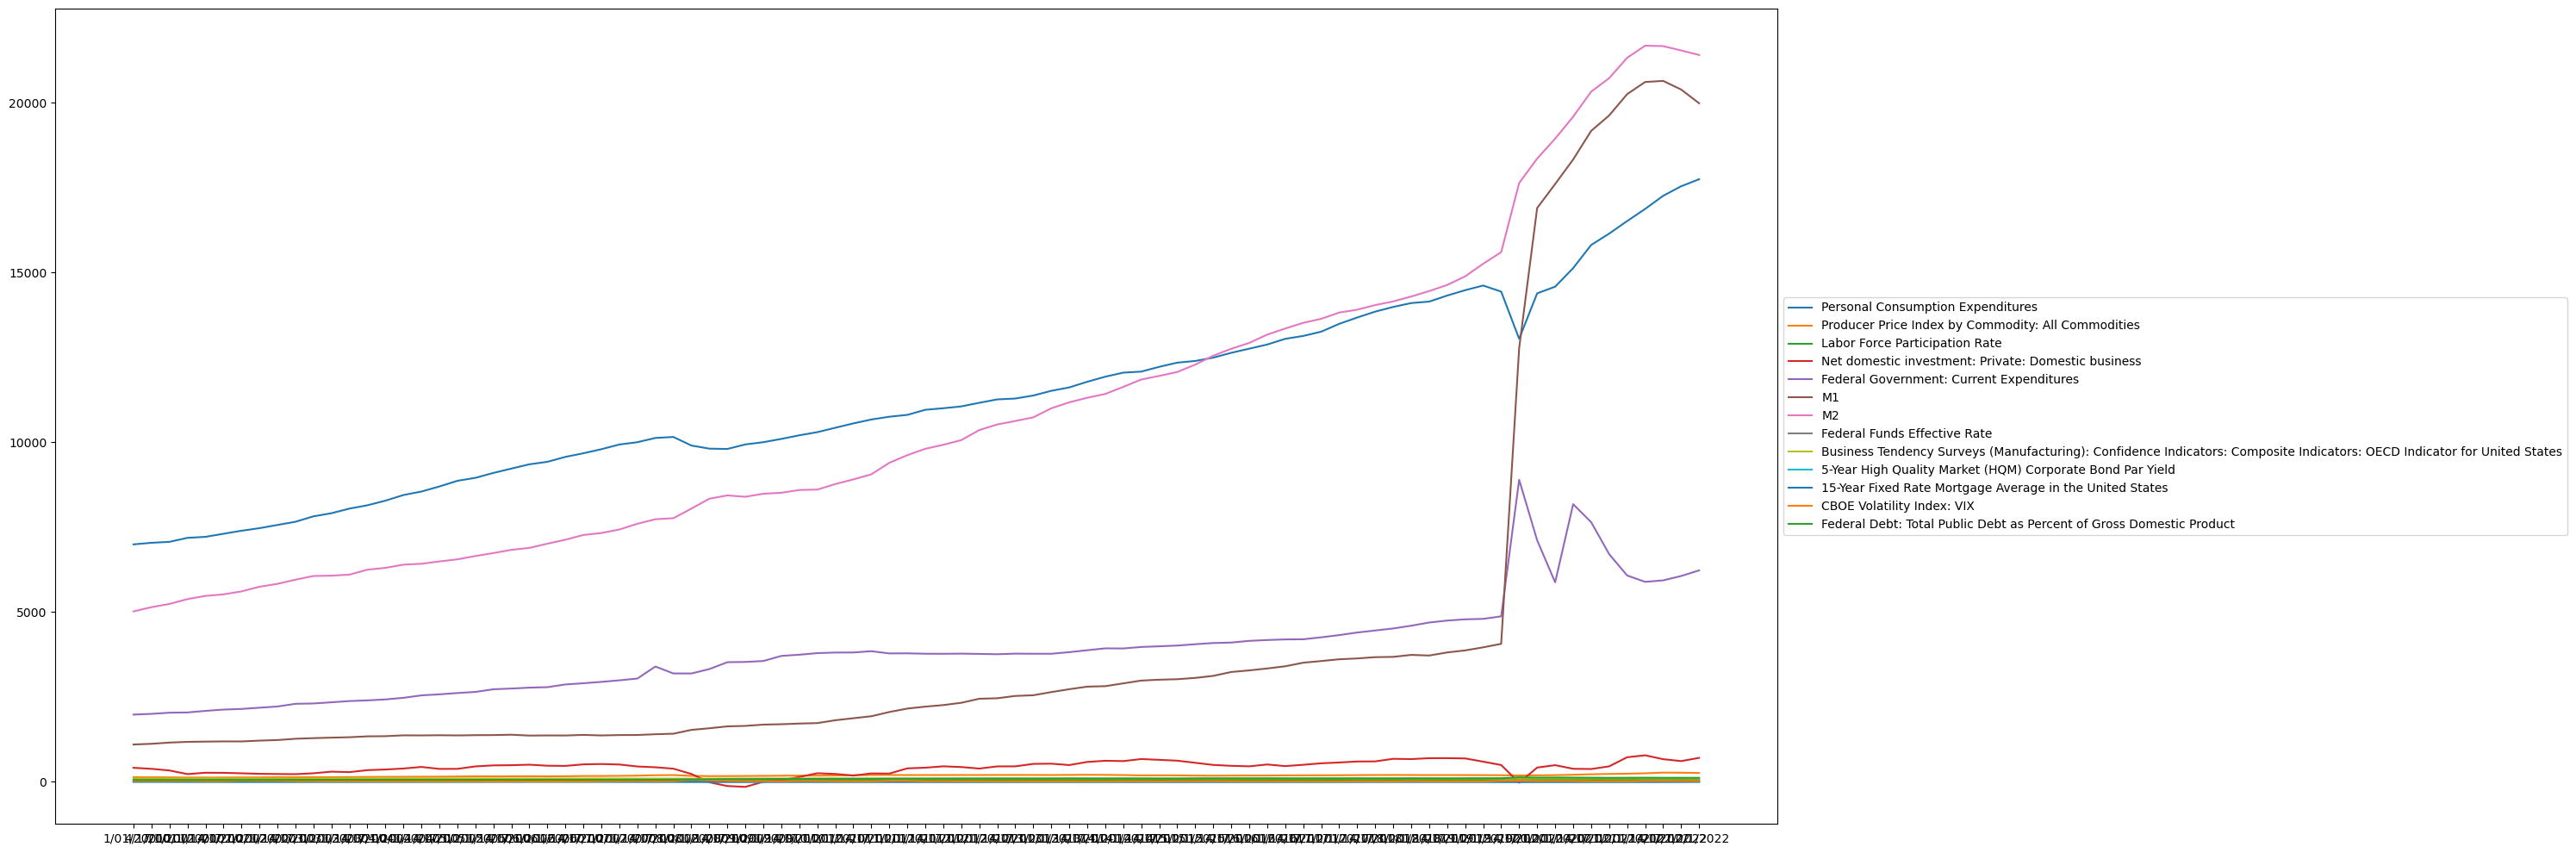

In [686]:
plt.figure(figsize=(30, 10))

# Plotting all columns except 'date'

plt.plot(date, data2_1['Rest of the World; Foreign Direct Investment in U.S.; Asset (Current Cost), Transactions'], label='Rest of the World; Foreign Direct Investment in U.S.; Asset (Current Cost), Transactions')

# Move the legend to the right of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Move legend outside

plt.tight_layout()  # Automatically adjust plot parameters to give more space
plt.show()
plt.figure(figsize=(30, 10))

# Plotting all columns except 'date'
for i in data2_1.columns:
    if i != 'date' and i != 'Rest of the World; Foreign Direct Investment in U.S.; Asset (Current Cost), Transactions':
        plt.plot(date, data2_1[i], label=i)

# Move the legend to the right of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Move legend outside

plt.tight_layout()  # Automatically adjust plot parameters to give more space
plt.show()

$\Large{\text{linear regression model}}$

In [690]:
features = len(data2_1.columns) - 2
print(features)
a = 10
b = 100

# Generate 13 random numbers in the range [a, b]
weights = a + (b - a) * np.random.rand(13)
b = np.random.rand(1)
print(weights)

13
[87.79180374 25.12475045 47.27319581 11.9407717  38.04782061 69.79311175
 63.84630181 39.93497976 89.68466058 13.9131911  64.78164307 74.52946906
 22.78921439]


In [691]:
def prediction(X_, w, b):
    return np.dot(X_, w) + b


    
    

$\Large\text{Data Preprocessing}$

In [692]:
X = np.array([f.iloc[i].tolist() for i in range(m)])

scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[-1.51055566  1.70982541 -0.04898172 ...  1.78046904  0.72715537
  -1.4119422 ]
 [-1.5600226   1.47663728 -0.20677136 ...  1.83407456  0.49556371
  -1.4600162 ]
 [-1.65244259  1.41834025 -0.46178752 ...  1.71920559  0.68237245
  -1.42692187]
 ...
 [ 2.84827531 -1.20502612  1.28183724 ...  0.14167173  0.94083387
   1.43643244]
 [ 2.75053456 -1.20502612  0.98335462 ...  0.47096278  0.60688125
   1.40026796]
 [ 2.49681493 -1.20502612  1.48350677 ...  1.29801937  0.633751
   1.39910185]]


$\Large{\text{cost function model}}$

In [693]:
y = data2_1['Personal Consumption Expenditures']

f = data2_1[['Producer Price Index by Commodity: All Commodities', 'Labor Force Participation Rate', 'Net domestic investment: Private: Domestic business', 'Federal Government: Current Expenditures', 'M1', 'M2','Federal Funds Effective Rate', 'Business Tendency Surveys (Manufacturing): Confidence Indicators: Composite Indicators: OECD Indicator for United States', '5-Year High Quality Market (HQM) Corporate Bond Par Yield', 'Rest of the World; Foreign Direct Investment in U.S.; Asset (Current Cost), Transactions', '15-Year Fixed Rate Mortgage Average in the United States', 'CBOE Volatility Index: VIX', 'Federal Debt: Total Public Debt as Percent of Gross Domestic Product']]

m = data2_1.shape[0]



def cost_f(y, X, b, w):
    error = prediction(X, w, b) - y
    summ = 0
    for i in error:
        summ += i**2
    return summ / (2 * len(error))


        

print(cost_f(y, X, b, weights))


    



        

66589774.34111636


In [694]:
def grad_cost_w(X, y, w, b):

    error = prediction(X, w, b) - y
    grad_vec = np.dot(X.T, error)
    return grad_vec * 1/len(y)

print(grad_cost_w(X, y, weights, b))

[-2356.02978137  2433.24344376 -1463.81643508 -2320.49843528
 -1964.80398897 -2557.91799988   984.51771805  -744.28656133
  1751.58798623 -1112.65317549  1921.70388237   317.1232892
 -2462.65747088]


In [695]:
def grad_cost_b(X, y, w, b):

    error = prediction(X, w, b) - y
    
    return np.sum(error) * 1/len(y)

print(grad_cost_b(X, y, weights, b))

-11236.104000097303


updating new weight values

In [696]:
alpha = 1e-5
weights = weights - alpha*grad_cost(X, y, weights, b)
print(weights)

[89.86510995 22.98349622 48.56135427 13.98281032 39.77684812 72.04407959
 62.97992622 40.58995193 88.14326316 14.8923259  63.09054366 74.25040056
 24.95635297]


$\Large{\text{Training process}}$

iterating the process some x amount of times, and seeing how cost function decreases

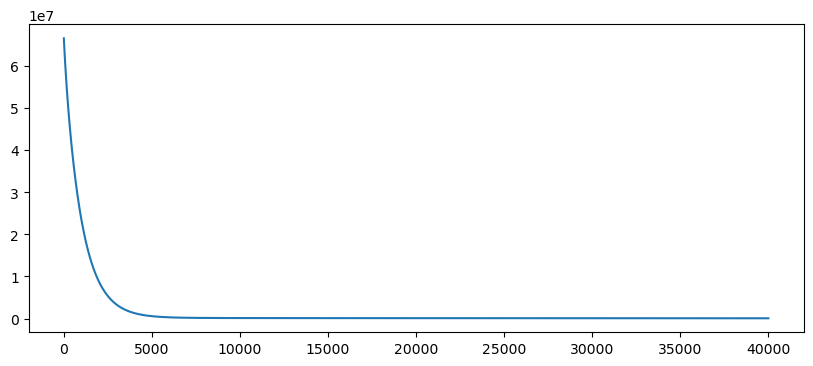

In [700]:
def optimization(X, y, w, b, it):
    plt.figure(figsize = (10,4))
    plt.xlabel = 'iterations'
    plt.ylabel = 'cost'
    cost_f_lst = []
    iterations = []
    ww = w
    for i in range(it):

        cost_f_lst.append(cost_f(y, X, b, ww))

        iterations.append(i+1)
        alpha = 5.0e-4
        ww = ww - alpha*grad_cost_w(X, y, ww, b)
        b = b - alpha*grad_cost_b(X, y, ww, b)
    plt.plot(iterations, cost_f_lst)    
    return ww, b
w, bb = optimization(X, y, weights, b, 40000)


In [702]:
prediction(X, w, bb)


array([ 7867.12657391,  7720.05244922,  7512.06395238,  7173.40575602,
        7359.79372984,  7436.60009761,  7276.00123925,  7343.60260108,
        7327.07769192,  7262.97208755,  7503.3894974 ,  7759.87344125,
        7830.54018437,  8160.97136202,  8204.938961  ,  8382.94230167,
        8581.30835202,  8557.78288339,  8797.70675726,  9181.96240594,
        9276.36338163,  9462.09116178,  9504.81651402,  9390.8196728 ,
        9477.94236864,  9795.06724027,  9847.17514843,  9798.39125413,
        9769.82986624, 10056.80842155, 10247.76090178,  9954.00142428,
        9404.37574001,  9413.85721758,  9320.31354554,  9649.10105088,
        9921.86914628, 10123.41507863, 10238.67467151, 10421.43836412,
       10682.7193167 , 10896.4157532 , 10985.07331251, 11261.62251123,
       11347.13609888, 11446.18815642, 11313.0033517 , 11336.90721061,
       11587.36037204, 11645.66622456, 11886.93148335, 12005.7048952 ,
       12012.33907845, 12340.8160671 , 12438.01536258, 12398.77643389,
      

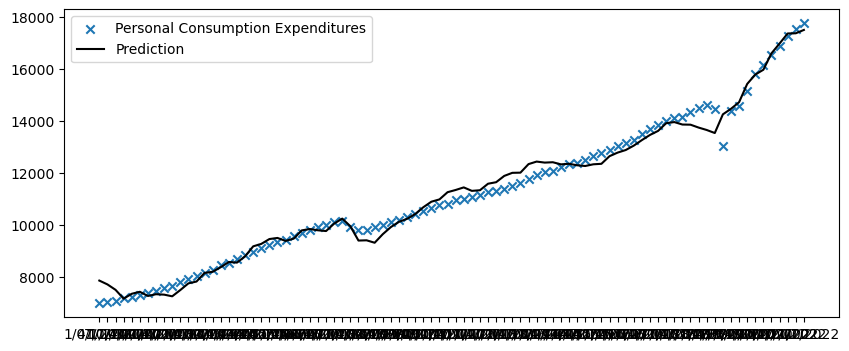

In [703]:
plt.figure(figsize = (10,4))
plt.scatter(date, data2_1['Personal Consumption Expenditures'], marker='x', label = 'Personal Consumption Expenditures')
plt.plot(date, prediction(X, w, bb), label = 'Prediction', color = 'black')
plt.legend()

$\Large{\text{can use this to predict personal consumption expenditure for dates within the timeframe}}$

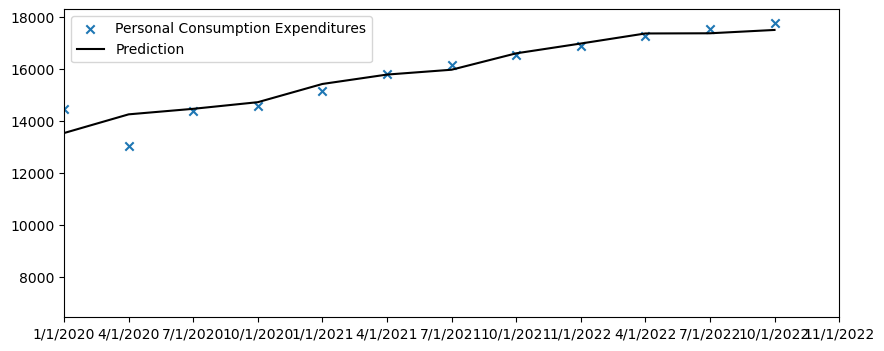

In [704]:
plt.figure(figsize = (10,4))
plt.scatter(date, data2_1['Personal Consumption Expenditures'], marker='x', label = 'Personal Consumption Expenditures')
plt.plot(date, prediction(X, w, bb), label = 'Prediction', color = 'black')
plt.xlim(['1/1/2020', '11/1/2022'])
plt.legend()